In [2]:
from dollo_tree import TreeNode
import _delete as dl
import numpy as np
import seaborn as sns
import parsing_tree_gwick as pt
import pandas as pd


tree_gw = "(a:1,(d:2,b:3,c:4),(e:1, f:2))"

tree1 = pt.loads(tree_gw)[0]

cn_max = 5
num_site = 8
leaf_cns = {}
tree1.count_leaves()

for node in tree1.nodes:
    leaf_cns[node.name] = np.random.randint(cn_max, size=num_site)
print(leaf_cns)
#leaf_cns = {"a":[1,2], "b":[2,4], "c":[3,6], "d":[4,8]}
#dl.calc_score_recursive(tree1, leaf_cns1, 1, 8)
#print(tree1.cn_score)
dl.calc_score_recursive_vect(tree1, leaf_cns, 1, cn_max, num_site)
print(tree1.cn_score)
print("number of leaf: %d" % tree1.num_leaves)
print("number of sites: %d" % num_site)
print("number of max copies: %d" % cn_max)

pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

pd.DataFrame(tree1.cn_score.transpose(), columns = [str(i+1) for i in range(num_site)]).to_csv("parsimony.csv")

fname = "parsimony.csv"
df = pd.read_csv(fname)

df["copy_number"] = [i for i in range(cn_max + 1)]
#pd.melt(df, id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], var_name = "num_site", value_name = "parsimony_score")
#ps_score.rename(rows = [str(i) for i in range(cn_max)])
#pd.melt(df, [str(i+1) for i in range(num_site)], id_values, var_name, value_name )
min_score = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
        var_name = "site_id", value_name = "parsimony_score")\
 .groupby("site_id")\
 .agg({"parsimony_score":"min"})
min_score['site'] = min_score.index
#type(min_score)
sns.catplot(x="site", y="parsimony_score", jitter=False, data=min_score)
sns.barplot(x="site", y="parsimony_score", data=min_score);




(a:1,(d:2,b:3,c:4),(e:1, f:2))
a:1
(d:2,b:3,c:4)
d:2
b:3
c:4
(e:1, f:2)
e:1
 f:2
a 1
d 2
b 3
c 4
e 5
f 6
{None: array([0, 0, 3, 1, 0, 4, 0, 3]), 'a': array([3, 1, 3, 1, 3, 2, 3, 3]), 'd': array([1, 0, 2, 1, 0, 1, 0, 0]), 'b': array([1, 2, 3, 1, 4, 2, 0, 4]), 'c': array([1, 4, 0, 4, 2, 4, 3, 4]), 'e': array([4, 2, 1, 3, 4, 0, 3, 0]), 'f': array([3, 0, 1, 2, 1, 2, 3, 3])}
[[inf  5.  4.  3.  5.  8.]
 [inf  7.  7. 10. 13. 16.]
 [inf  6.  5.  6.  9. 12.]
 [inf  5.  6.  8. 11. 14.]
 [inf 10.  8.  8. 10. 13.]
 [inf  7.  5.  8. 11. 14.]
 [inf  8.  7.  6.  9. 12.]
 [inf 12. 10.  8.  9. 12.]]
number of leaf: 6
number of sites: 8
number of max copies: 5


max 16.0


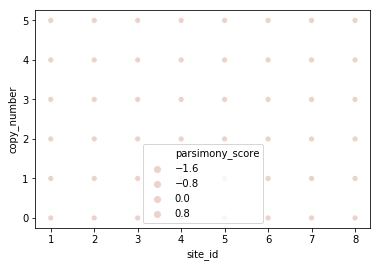

In [19]:
def plot_parsimony(fname, cn_max, num_site, min=False):
    df = pd.read_csv(fname)
    df["copy_number"] = [i for i in range(cn_max + 1)]
    df = df.melt(id_vars = ["copy_number"], value_vars = [str(i+1) for i in range(num_site)], 
            var_name = "site_id", value_name = "parsimony_score")\

     
    min_score = df.groupby("site_id")\
                .agg({"parsimony_score":"min"})
    min_score['site'] = min_score.index
    #type(min_score)
    max_hue = max(df[df.parsimony_score != np.inf].parsimony_score)
    #print(df[df.parsimony_score != np.inf])
    panel = sns.cubehelix_palette(max_hue, start=2, rot=0, dark=0, light=.95, reverse=True)
    print("max",max_hue)
    if min:
        sns.barplot(x="site", y="parsimony_score", data=min_score);
    else:
        colors = ["#FF0B04", "#4374B3"]
        sns.set_palette(sns.color_palette(colors))
        sns.scatterplot(x="site_id", y="copy_number", data=df, hue="parsimony_score")
   


#plot_parsimony("parsimony.csv", cn_max, num_site, True)
plot_parsimony("parsimony.csv", cn_max, num_site)
    